# Supplementary Material:
## SchemaTree recommender evaluation results for the LOD-a-Lot dataset

Loading and preparing the evaluation results:

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# load data sets
counts  = pd.read_csv("results/LOD_counts.csv",encoding = "ISO-8859-1", skipinitialspace=True, sep=" ", header=None,names=["count","numNonTypes","trash"])
prefix = "results/LOD_a_lot_v1-1in10000000-test-r1-"
df_recommender   = pd.read_csv(prefix+"standard-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_typed         = pd.read_csv(prefix+"typed-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_typed_backoff = pd.read_csv(prefix+"typed-tooFewRecs-takeMoreButCommon-numNonTypes-stats.csv",encoding = "ISO-8859-1", skipinitialspace=True)

# extend information
df_recommender['Recommender']='Standard'
df_typed['Recommender']='Typed'
df_typed_backoff['Recommender']='Typed \& Backoff'

# combine results
df_combined = pd.concat([
    df_recommender,
    df_typed,
    df_typed_backoff,
])

# compute F1 & reciprocal rank
df_combined["f1"]=2*df_combined["precisionAtL"]*df_combined["recall"]/(df_combined["precisionAtL"]+df_combined["recall"])
df_combined["RR"]=1/df_combined["mean"]

# filter out the aggregated columns
group = df_combined.columns[0]
aggregated = df_combined[df_combined[group]==-1]
df_combined = df_combined[df_combined[group] >=0]

#### Summary results of the different recommenders over all evaluated recommendation requests:

In [2]:
aggregated.iloc[:, [14,1,3,5,6,7,8,9,10,11,12,13,15,16,2]]

,Recommender,subjects,mean,median,stddev,top1,top5,top10,topL,recall,precision,precisionAtL,f1,RR,duration
0,Standard,123731,9.4433,1.0,46.0536,75.8735,85.6988,90.224,81.3975,97.9065,18.0645,59.5663,74.069020,0.105895,2670.6998
0,Typed,123731,2.7836,1.0,16.9431,84.7265,93.9045,97.417,89.7293,99.4509,23.2183,68.9024,81.405065,0.359247,410.9850
0,Typed \& Backoff,123731,2.7838,1.0,16.9421,84.7249,93.9021,97.417,89.7269,99.4509,23.2183,68.9007,81.403879,0.359221,410.9490


#### Create detailed plot of interesting metrics:

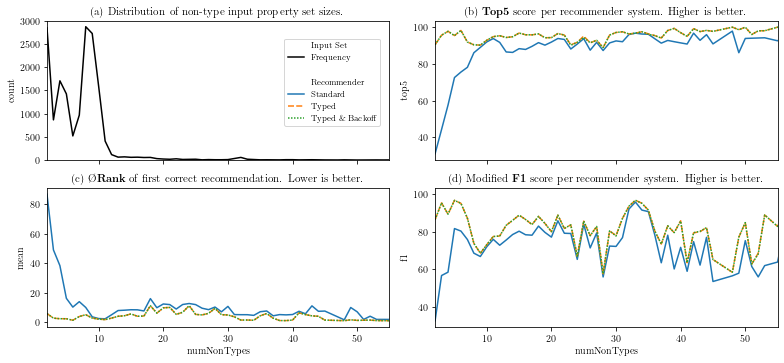

In [3]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(11, 5), sharex=True)

ax = axes.flat[0]
ax.set_xlim(2,55)
ax.set_ylim(0,3000)
cline = sns.lineplot(
    x=counts["numNonTypes"], 
    y="count", 
    data=counts,
    color="black",
    ax=ax,
)
   
for axx, column in zip(axes.flat[1:], df_combined[["top5","mean","f1"]]):
    sns.lineplot(
        x=group, 
        y=column, 
        hue="Recommender",
        data=df_combined, 
        style="Recommender",
        ax=axx,
    )
    axx.set_xlim(2,55)
    axx.get_legend().remove()

f.tight_layout()

handles, labels = axx.get_legend_handles_labels()
handles = [ handles[0], cline.get_lines()[0], handles[0]] + handles
labels  = ['Input Set', 'Frequency',''] + labels
f.legend(handles, labels, loc='center right', bbox_to_anchor=(0.485, 0.78), fontsize='small')

labels = [
    r'(a) Distribution of non-type input property set sizes.',
    r'(b) $\mathbf{Top5}$ score per recommender system. Higher is better.',
    r'(c) $\mathbf{ØRank}$ of first correct recommendation. Lower is better.',
    r'(d) Modified $\mathbf{F1}$ score per recommender system. Higher is better.',
]
for ax, label in zip(axes.flat, labels):
    ax.set_title(label, fontsize=11)

plt.subplots_adjust(hspace=0.2)

# f.savefig('combined.pdf', bbox_inches='tight')

#### Create and save additional detailed plots:

In [1]:
for column in df_combined[df_combined.columns[~df_combined.columns.isin(['Recommender'])]].iloc[:,2:]:

    plt.figure(num=None, figsize=(8, 3))
    g = sns.lineplot(
        x=group, 
        y=column, 
        hue="Recommender",
        data=df_combined, 
        style ="Recommender",
    )
    ax = g.axes
    ax.set_xlim(2,55)
    ax.legend(fancybox=True, framealpha=0.5, loc='upper right')
    
    plt.subplots_adjust(bottom=0.2)
#     plt.savefig(column+'.pdf', bbox_inches='tight')
    
plt.figure(num=None, figsize=(8, 3))
g = sns.lineplot(
    x=counts["numNonTypes"], 
    y=counts["count"], 
    data=counts,
    color="black",
)
ax = g.axes
ax.set_xlim(2,55)
# plt.savefig('LOD_counts.pdf', bbox_inches='tight')

NameError: name 'df_combined' is not defined

#### Detailed evaluation results:

In [5]:
df_combined

,numNonTypes,subjects,duration,mean,meanOfHits,median,stddev,top1,top5,top10,topL,recall,precision,precisionAtL,Recommender,f1,RR
1,2,2414,10511.0329,86.7498,40.9176,11.0,159.6074,19.8012,31.1516,31.1516,19.8012,90.0166,5.2850,19.8012,Standard,32.461708,0.011527
2,3,4298,8789.6953,49.0021,31.6770,21.0,110.5881,40.4374,44.3229,45.1605,40.5305,94.1019,9.2746,40.4723,Standard,56.601047,0.020407
3,4,2496,6587.6079,38.3385,25.4090,3.0,91.8028,42.3478,57.6122,66.3462,46.5946,95.1522,12.2951,42.1207,Standard,58.392840,0.026083
4,5,7080,4020.3970,16.2027,12.7617,1.0,56.0671,71.2288,72.5989,73.7994,71.4689,98.5064,45.6096,69.7434,Standard,81.666323,0.061718
5,6,7040,3387.6348,10.2548,9.3488,1.0,42.6847,71.8608,75.5966,91.8892,72.4148,98.7637,34.9995,67.6870,Standard,80.324307,0.097515
6,7,3348,4002.7306,13.9388,12.1903,1.0,50.7106,69.6237,78.1661,83.7216,74.3728,98.0785,9.6694,61.8130,Standard,75.833003,0.071742
7,8,7133,3049.6917,10.0077,9.3198,1.0,38.9053,72.2137,86.0928,90.4108,76.8821,98.2235,10.5990,52.6248,Standard,68.532321,0.099923
8,9,22792,2035.3173,3.6693,3.4732,1.0,14.5004,74.4823,89.0137,94.6648,80.6160,99.4034,4.2599,50.2469,Standard,66.751790,0.272532
9,10,24894,1749.6533,2.4899,2.4499,1.0,8.3529,78.5169,91.9900,97.1278,86.9045,99.5191,7.0872,56.3455,Standard,71.952880,0.401623
10,11,15500,1707.3175,2.3366,2.2082,1.0,10.5303,83.8129,93.8258,97.7742,91.2065,99.5717,12.2068,61.3570,Standard,75.927051,0.427972
